In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("../../project_functions/")
from matplotlib import pyplot as plt
import ad_functions as adfns
# import sipa_rep_functions as sf
# import sipa08_functions as s8fns
import pytesseract
import cv2
import numpy as np
import pandas as pd
import os
import shutil
from icecream import ic

# psm 6 = Assume a single uniform block of text.
config_tesseract = '--tessdata-dir ./ttesseract_langs --psm 7 digits'

In [2]:
file_path = "./cropped_images_s11/11/"
file_list = os.listdir(file_path)

file_list, len(file_list)

(['S11_F01.png',
  'S11_F02.png',
  'S11_F03.png',
  'S11_F04.png',
  'S11_F05.png',
  'S11_F06.png',
  'S11_F07.png',
  'S11_F08.png',
  'S11_F09.png',
  'S11_F10.png',
  'S11_F11.png',
  'S11_F12.png',
  'S11_F13.png',
  'S11_F14.png'],
 14)

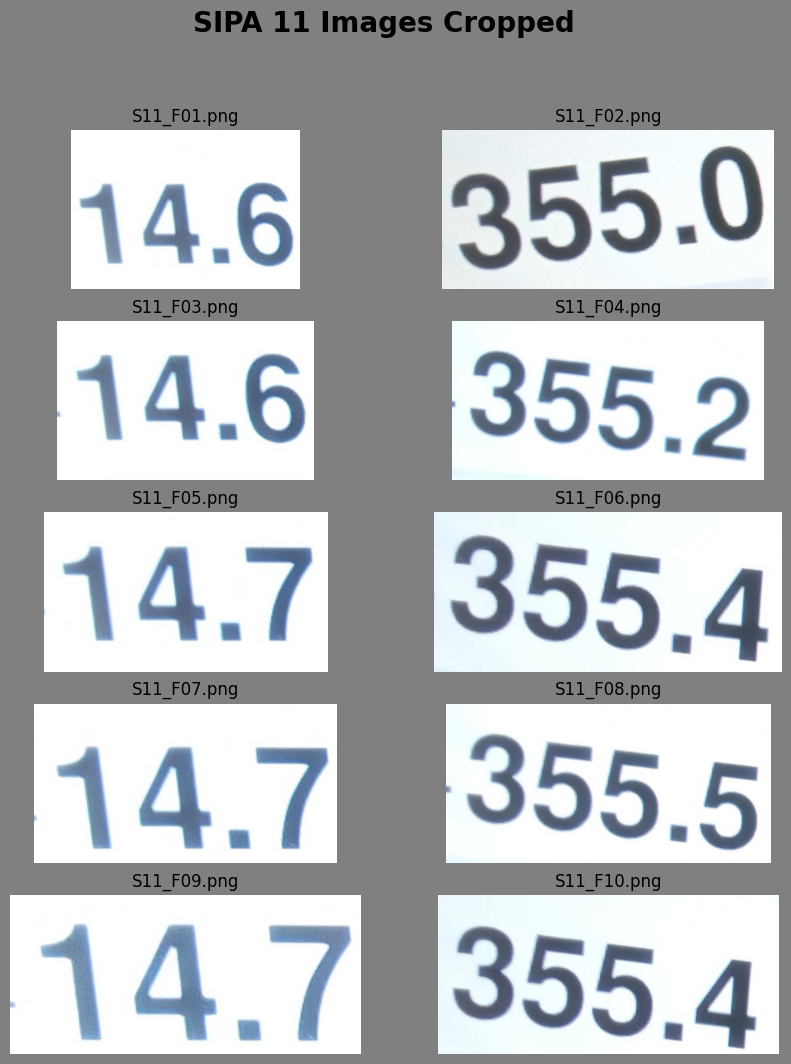

In [3]:
adfns.display_ten_images(file_path, "SIPA 11 Images Cropped")

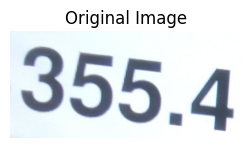

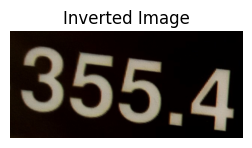

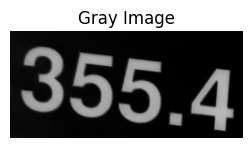

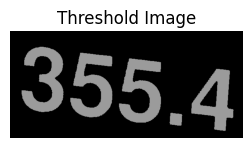

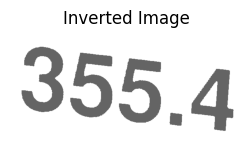

Text in Threshold Image:  366.61
SSD in Threshold Image:  355.4
English in Threshold Image:  355.4
Dot Matrix in Threshold Image:  36564
Text in Inverted Image:  366.61
SSD in Inverted Image:  355.4
English in Inverted Image:  355.4
Dot Matrix in Inverted Image:  36564


In [4]:
image_path = "./cropped_images_s11/11/S11_F06.png"


# img = cv2.imread(image_path)
# masked_green = adfns.mask_green(img)
# masked_green_gray = cv2.cvtColor(masked_green, cv2.COLOR_BGR2GRAY)
# blur_kernel=(3, 3)
# blurred_img = cv2.GaussianBlur(masked_green_gray, blur_kernel, 0)
# inverted_img = cv2.bitwise_not(blurred_img)
# thresh = cv2.threshold(inverted_img, 80, 155, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# blur = cv2.GaussianBlur(inverted_img,(5,5),0)
# ret,Otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Load the image
img = cv2.imread(image_path)
adfns.show_img(img, size=3, title="Original Image")

inverted_img = cv2.bitwise_not(img)
adfns.show_img(inverted_img, size=3, title="Inverted Image")

gray_img = cv2.cvtColor(inverted_img, cv2.COLOR_BGR2GRAY)
adfns.show_img(gray_img, size=3, title="Gray Image")

thresh_img = cv2.threshold(gray_img, 80, 155, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
adfns.show_img(thresh_img, size=3, title="Threshold Image")

# use opencv to invert the image
invert_img = cv2.bitwise_not(thresh_img)
adfns.show_img(invert_img, size=3, title="Inverted Image")

text_lets_thresh, text_ssd_thresh, text_eng_thresh, text_dotmatrix_thresh  = adfns.get_text_lets(thresh_img)
text_lets_invert, text_ssd_invert, text_eng_invert, text_dotmatrix_invert  = adfns.get_text_lets(invert_img)

print("Text in Threshold Image: ", text_lets_thresh)
print("SSD in Threshold Image: ", text_ssd_thresh)
print("English in Threshold Image: ", text_eng_thresh)
print("Dot Matrix in Threshold Image: ", text_dotmatrix_thresh)

print("Text in Inverted Image: ", text_lets_invert)
print("SSD in Inverted Image: ", text_ssd_invert)
print("English in Inverted Image: ", text_eng_invert)
print("Dot Matrix in Inverted Image: ", text_dotmatrix_invert)




S11_F01.png


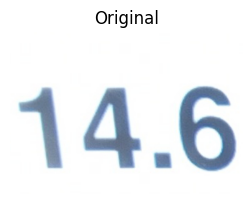

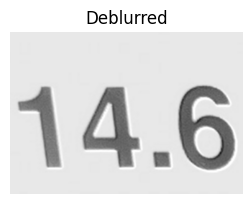

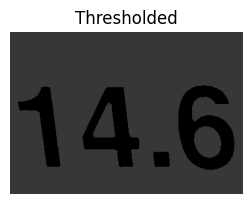

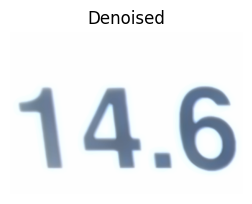

* >>> Original ssd:  74.6
* >>> Deblurred ssd:  74.5
* >>> Thresh ssd:  74.5
* >>> Deionised ssd:  74.5
****************************************************
* >>> Original eng:  14.6
* >>> Deblurred eng:  14.6
* >>> Thresh eng:  14.6
* >>> Deionised eng:  14.6
****************************************************
S11_F02.png


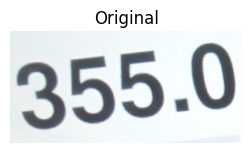

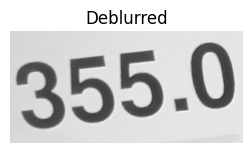

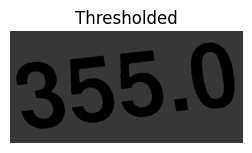

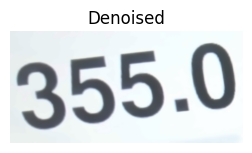

* >>> Original ssd:  355.9
* >>> Deblurred ssd:  355.9
* >>> Thresh ssd:  355.9
* >>> Deionised ssd:  355.9
****************************************************
* >>> Original eng:  355.0
* >>> Deblurred eng:  355.0
* >>> Thresh eng:  355.0
* >>> Deionised eng:  355.0
****************************************************
S11_F03.png


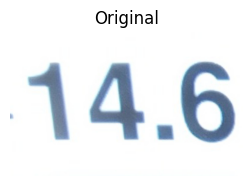

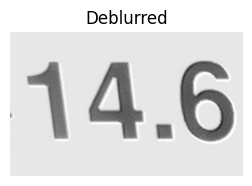

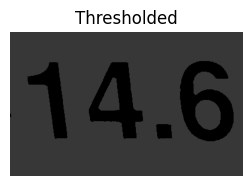

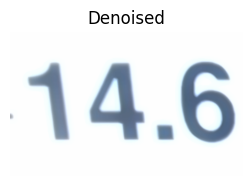

* >>> Original ssd:  74.6
* >>> Deblurred ssd:  74.5
* >>> Thresh ssd:  74.5
* >>> Deionised ssd:  74.6
****************************************************
* >>> Original eng:  14.6
* >>> Deblurred eng:  14.6
* >>> Thresh eng:  14.6
* >>> Deionised eng:  14.6
****************************************************
S11_F04.png


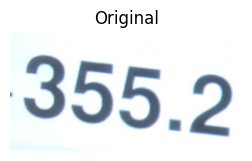

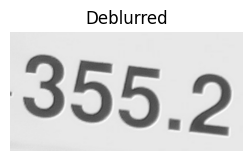

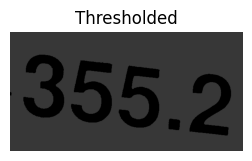

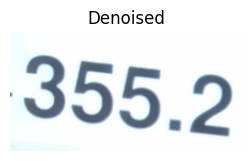

* >>> Original ssd:  9356.2
* >>> Deblurred ssd:  9356.2
* >>> Thresh ssd:  956.2
* >>> Deionised ssd:  356.2
****************************************************
* >>> Original eng:  355.2
* >>> Deblurred eng:  355.2
* >>> Thresh eng:  355.2
* >>> Deionised eng:  355.2
****************************************************
S11_F05.png


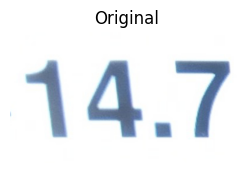

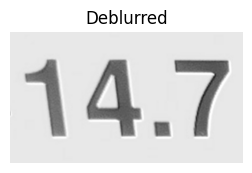

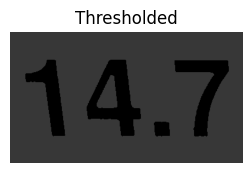

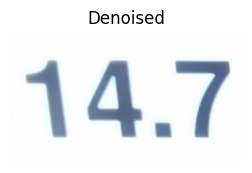

* >>> Original ssd:  14.7
* >>> Deblurred ssd:  14.7
* >>> Thresh ssd:  14.7
* >>> Deionised ssd:  14.7
****************************************************
* >>> Original eng:  14.7
* >>> Deblurred eng:  14.7
* >>> Thresh eng:  14.7
* >>> Deionised eng:  14.7
****************************************************
S11_F06.png


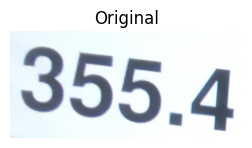

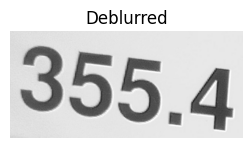

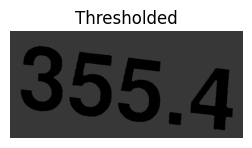

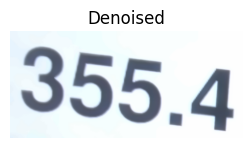

* >>> Original ssd:  355.4
* >>> Deblurred ssd:  355.4
* >>> Thresh ssd:  355.4
* >>> Deionised ssd:  355.4
****************************************************
* >>> Original eng:  355.4
* >>> Deblurred eng:  355.4
* >>> Thresh eng:  355.4
* >>> Deionised eng:  355.4
****************************************************
S11_F07.png


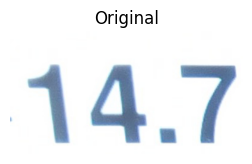

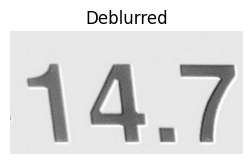

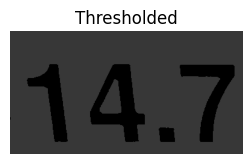

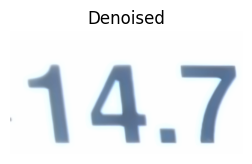

* >>> Original ssd:  14.7
* >>> Deblurred ssd:  14.7
* >>> Thresh ssd:  14.7
* >>> Deionised ssd:  14.7
****************************************************
* >>> Original eng:  14.7
* >>> Deblurred eng:  147
* >>> Thresh eng:  147
* >>> Deionised eng:  14.7
****************************************************
S11_F08.png


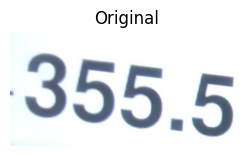

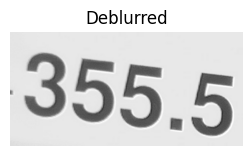

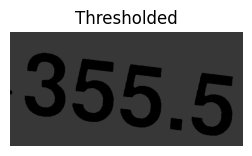

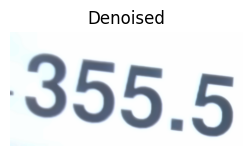

* >>> Original ssd:  3556.5
* >>> Deblurred ssd:  9355.5
* >>> Thresh ssd:  955.5
* >>> Deionised ssd:  3556.5
****************************************************
* >>> Original eng:  355.5
* >>> Deblurred eng:  355.5
* >>> Thresh eng:  355.5
* >>> Deionised eng:  355.5
****************************************************
S11_F09.png


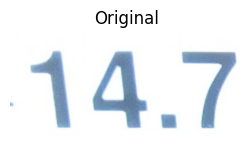

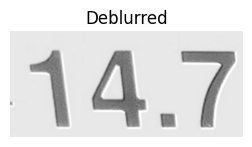

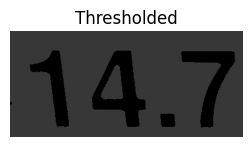

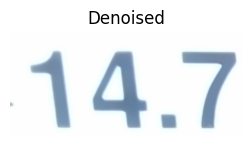

* >>> Original ssd:  74.7
* >>> Deblurred ssd:  74.7
* >>> Thresh ssd:  74.7
* >>> Deionised ssd:  74.7
****************************************************
* >>> Original eng:  14.7
* >>> Deblurred eng:  147
* >>> Thresh eng:  147
* >>> Deionised eng:  14.7
****************************************************
S11_F10.png


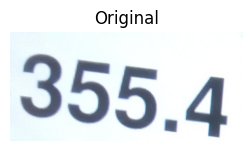

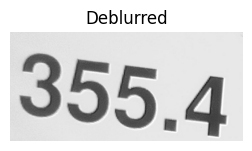

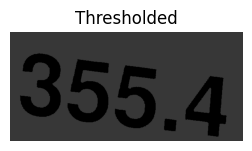

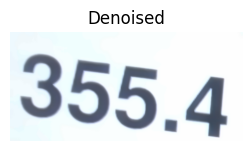

* >>> Original ssd:  355.4
* >>> Deblurred ssd:  355.4
* >>> Thresh ssd:  355.4
* >>> Deionised ssd:  355.4
****************************************************
* >>> Original eng:  355.4
* >>> Deblurred eng:  355.4
* >>> Thresh eng:  355.4
* >>> Deionised eng:  355.4
****************************************************
S11_F11.png


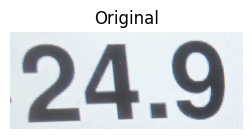

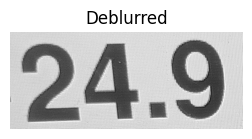

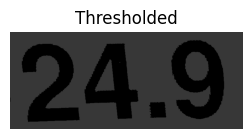

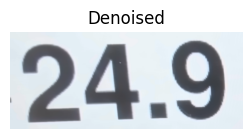

* >>> Original ssd:  24.9
* >>> Deblurred ssd:  24.9
* >>> Thresh ssd:  24.9
* >>> Deionised ssd:  24.9
****************************************************
* >>> Original eng:  249
* >>> Deblurred eng:  249
* >>> Thresh eng:  249
* >>> Deionised eng:  249
****************************************************
S11_F12.png


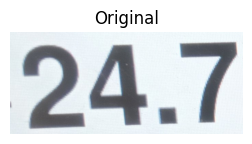

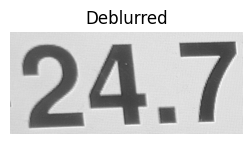

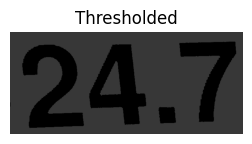

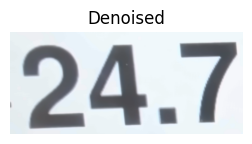

* >>> Original ssd:  24.7
* >>> Deblurred ssd:  24.1
* >>> Thresh ssd:  2.4.7
* >>> Deionised ssd:  24.7
****************************************************
* >>> Original eng:  4
* >>> Deblurred eng:  24
* >>> Thresh eng:  24.7
* >>> Deionised eng:  24.7
****************************************************
S11_F13.png


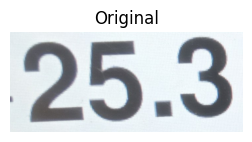

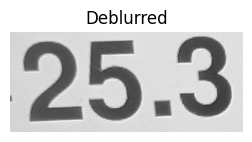

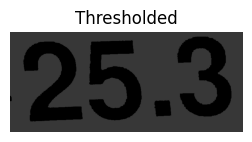

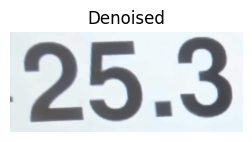

* >>> Original ssd:  165.3
* >>> Deblurred ssd:  125.9
* >>> Thresh ssd:  25.3
* >>> Deionised ssd:  25.3
****************************************************
* >>> Original eng:  25.3
* >>> Deblurred eng:  95.3
* >>> Thresh eng:  25.3
* >>> Deionised eng:  25.3
****************************************************
S11_F14.png


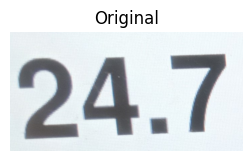

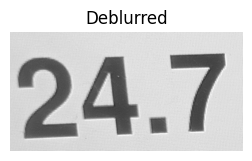

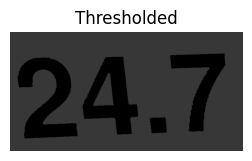

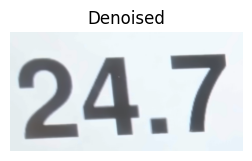

* >>> Original ssd:  24.7
* >>> Deblurred ssd:  24.7
* >>> Thresh ssd:  24.7
* >>> Deionised ssd:  24.7
****************************************************
* >>> Original eng:  24.7
* >>> Deblurred eng:  24.7
* >>> Thresh eng:  24.7
* >>> Deionised eng:  24.7
****************************************************


In [16]:
# image deblurring

for filename in file_list:
    print(filename)

    img = cv2.imread(file_path + filename)
    # img_resized = adfns.read_resize_data(img, 400)

    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Define the blur kernel (e.g., Gaussian blur kernel)
    kernel_size = 5
    kernel = cv2.getGaussianKernel(kernel_size, 0)
    psf = kernel @ kernel.T

    # Define the Wiener filter
    snr = 0.1  # signal-to-noise ratio
    psf /= np.sum(psf)
    otf = np.fft.fft2(psf)
    otf = np.conj(otf) / (np.abs(otf)**2 + snr)
    wiener_filter = np.fft.ifft2(otf)

    # Perform deconvolution using the Wiener filter
    deblurred = cv2.filter2D(gray, -1, wiener_filter.real)

    # Apply thresholding to the deblurred image
    thresh = cv2.threshold(deblurred, 0, 55, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    dst = cv2.fastNlMeansDenoisingColored(img, None, 6, 16, 7, 21)
    denoise_image = adfns.denoise_image(img)

    # Display the original and normalized images
    adfns.show_img(img, 3, title="Original")
    adfns.show_img(deblurred, 3, title="Deblurred")
    adfns.show_img(thresh, 3, title="Thresholded")
    adfns.show_img(dst, 3, title="Denoised")

    text_ssd_original, text_eng_original  = adfns.get_text(img)
    text_ssd_deblurred, text_eng_deblurred  = adfns.get_text(deblurred)
    text_ssd_thresh, text_eng_thresh    = adfns.get_text(thresh)
    text_ssd_deionised, text_eng_deionised = adfns.get_text(denoise_image)

    print("* >>> Original ssd: ", text_ssd_original)
    print("* >>> Deblurred ssd: ", text_ssd_deblurred)
    print("* >>> Thresh ssd: ", text_ssd_thresh)
    print("* >>> Deionised ssd: ", text_ssd_deionised)
    print("****************************************************")

    print("* >>> Original eng: ", text_eng_original)
    print("* >>> Deblurred eng: ", text_eng_deblurred)
    print("* >>> Thresh eng: ", text_eng_thresh)
    print("* >>> Deionised eng: ", text_eng_deionised)
    print("****************************************************")



filename:  S11_F01.png
Rotation angle:  0


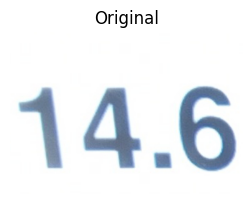

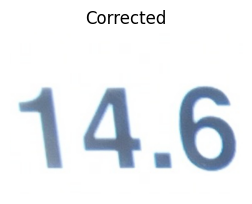

filename:  S11_F02.png
Rotation angle:  -6.0


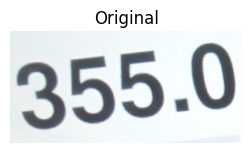

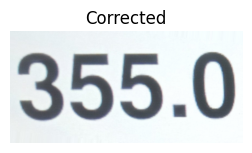

filename:  S11_F03.png
Rotation angle:  0


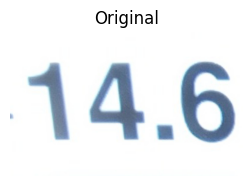

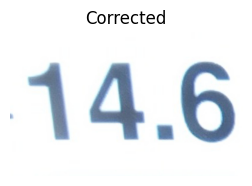

filename:  S11_F04.png
Rotation angle:  6.0


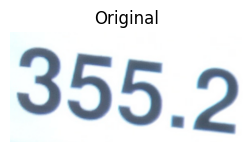

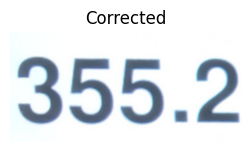

filename:  S11_F05.png
Rotation angle:  0


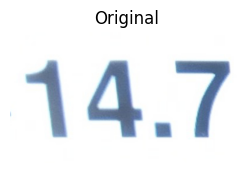

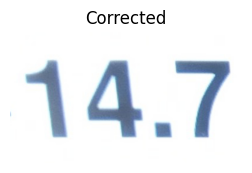

filename:  S11_F06.png
Rotation angle:  6.999992370605469


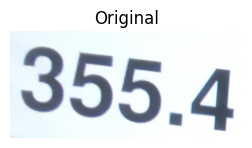

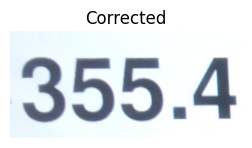

filename:  S11_F07.png
Rotation angle:  0


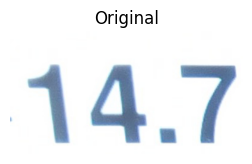

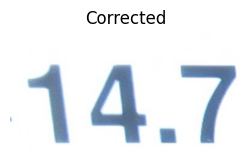

filename:  S11_F08.png
Rotation angle:  6.999992370605469


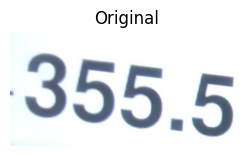

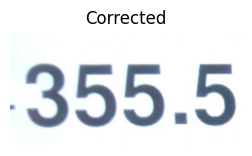

filename:  S11_F09.png
Rotation angle:  0


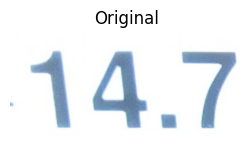

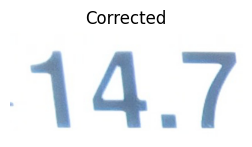

filename:  S11_F10.png
Rotation angle:  6.999992370605469


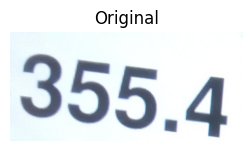

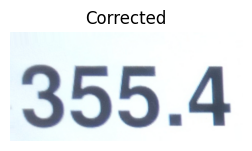

filename:  S11_F11.png
Rotation angle:  -2.0000076293945312


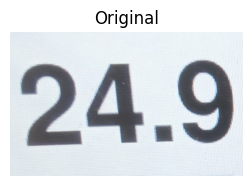

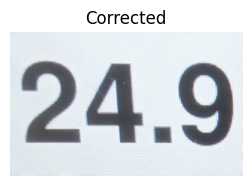

filename:  S11_F12.png
Rotation angle:  -2.0000076293945312


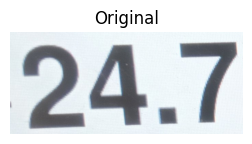

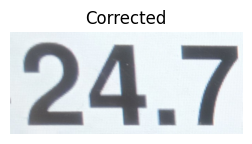

filename:  S11_F13.png
Rotation angle:  -2.0000076293945312


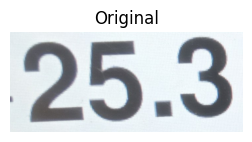

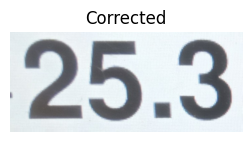

filename:  S11_F14.png
Rotation angle:  -2.0000076293945312


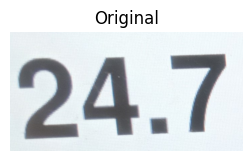

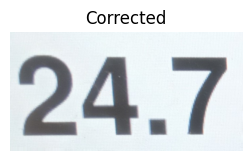

In [22]:

for filename in file_list:

    print("filename: ", filename)
    
    # Load the image
    image = cv2.imread(file_path + filename)

    # Calculate the rotation angle
    rotation_angle = adfns.get_rotation_angle(image)

    # # Rotate the image
    # corrected_image = adfns.rotate_image(image, rotation_angle)

    # Rotate the image if the rotation angle is not 0, otherwise keep the original image
    corrected_image = adfns.rotate_image(image, rotation_angle) if rotation_angle != 0 else image
    

    print("Rotation angle: ", rotation_angle)
    
    adfns.show_img(image, 3, title="Original")
    adfns.show_img(corrected_image, 3, title="Corrected")
